# Model Creation For Crowd Couter

In this notebook I'm about to create a model for crowd counter app based on object detection.
[Link to dataset](https://www.kaggle.com/datasets/constantinwerner/human-detection-dataset)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import helper_functions

## Data preparation

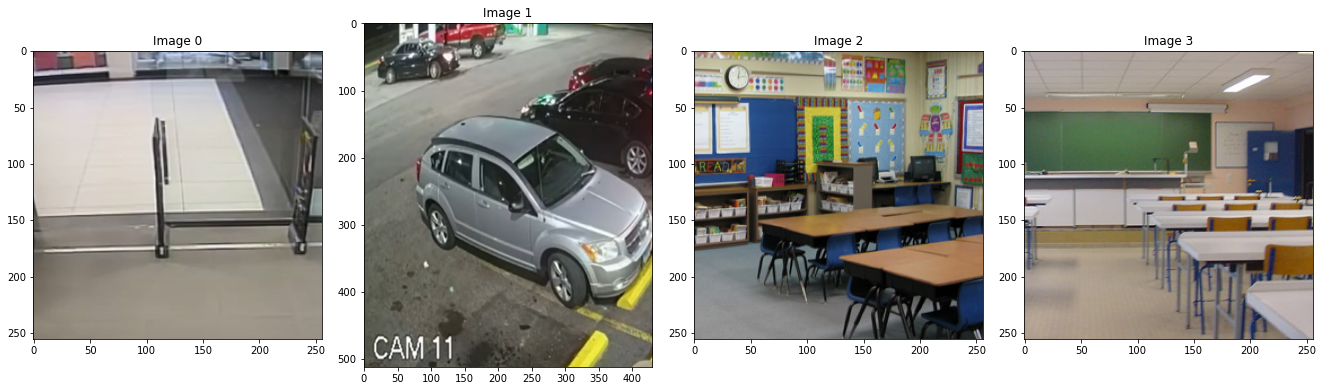

In [6]:
# plot some images without people

helper_functions.plot_images(label="0")

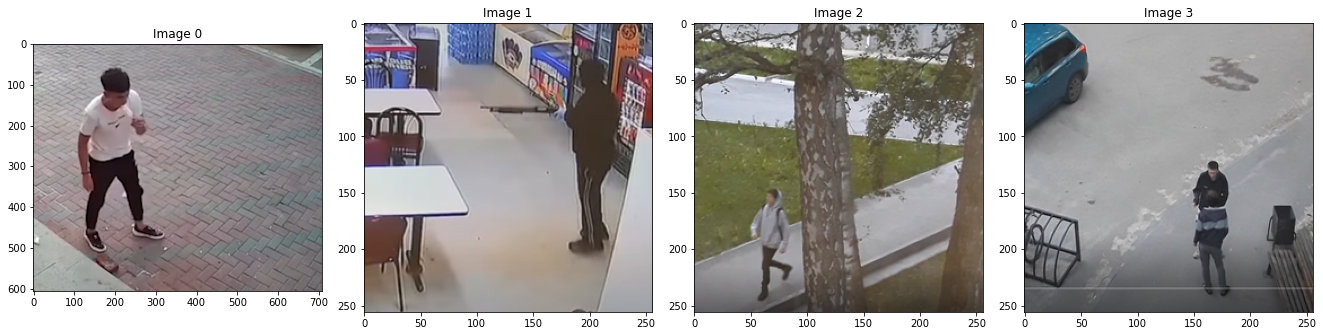

In [7]:
# plot some images with people

helper_functions.plot_images(label="1")

In [9]:
# as seen in above cells images are in different size, but it's
# not something that data preprocessing can't handle

# preprocessing (generating) data
datagen_v1 = ImageDataGenerator(rescale=1./255,
                                rotation_range=20,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                validation_split=0.2)

# seed for further reproduction
tf.random.set_seed(13)

# set path to images
dir = "human-detection-dataset/"

# import data from <dir> and turn it into batches
data = datagen_v1.flow_from_directory(directory=dir,
                                      batch_size=32,
                                      target_size=(256,256),   # 256x256 is original size of most images
                                      class_mode="binary",
                                      seed=13)

Found 921 images belonging to 2 classes.


## Classification model